In [1]:
import sys
import os
import pandas as pd
import scanpy as sc
from scipy import sparse
import numpy as np
import matplotlib.pyplot as plt
import squidpy as sq
import spatialdm as sdm
import seaborn as sns

In [3]:
!ifconfig

eno1: flags=4099<UP,BROADCAST,MULTICAST>  mtu 1500
        ether 24:6e:96:42:29:c0  txqueuelen 1000  (Ethernet)
        RX packets 0  bytes 0 (0.0 B)
        RX errors 0  dropped 0  overruns 0  frame 0
        TX packets 0  bytes 0 (0.0 B)
        TX errors 0  dropped 0 overruns 0  carrier 0  collisions 0

eno2: flags=4099<UP,BROADCAST,MULTICAST>  mtu 1500
        ether 24:6e:96:42:29:c2  txqueuelen 1000  (Ethernet)
        RX packets 0  bytes 0 (0.0 B)
        RX errors 0  dropped 0  overruns 0  frame 0
        TX packets 0  bytes 0 (0.0 B)
        TX errors 0  dropped 0 overruns 0  carrier 0  collisions 0

eno3: flags=4163<UP,BROADCAST,RUNNING,MULTICAST>  mtu 9000
        inet 172.17.26.175  netmask 255.255.255.0  broadcast 172.17.26.255
        inet6 fe80::266e:96ff:fe42:29c4  prefixlen 64  scopeid 0x20<link>
        ether 24:6e:96:42:29:c4  txqueuelen 1000  (Ethernet)
        RX packets 1328476130  bytes 5519448254520 (5.0 TiB)
        RX errors 0  dropped 289  overruns 0  frame 0


In [212]:
import requests

# The URL to which the form submits (observed from the form's action attribute)
submit_url = 'http://tcm.zju.edu.cn/celltalkdb/handler/download.php'

# The form data you need to send with the POST request
form_data = {
    'ip': '73.10.169.82',
    'agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0',
    'ref': 'http://tcm.zju.edu.cn/celltalkdb/browser.php?list=lr_pairs',
    'time': '2024-03-04 02:41:53',
    'folder': 'download/processed_data/',
    'filename': 'human_gene_info.txt'
}

# Make the POST request to the form's action URL with the form data
response = requests.post(submit_url, data=form_data)

# Check if the request was successful
if response.status_code == 200:
    # Write the content of the response to a file
    with open('human_gene_info.txt', 'wb') as file:
        file.write(response.content)
    print("File downloaded successfully.")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")


File downloaded successfully.


In [211]:
import requests

# The URL to which the form submits (observed from the form's action attribute)
submit_url = 'http://tcm.zju.edu.cn/celltalkdb/handler/download.php'

# The form data you need to send with the POST request
form_data = {
    'folder': 'download/processed_data/',
    'filename': 'human_gene_info.txt'
}

# Make the POST request to the form's action URL with the form data
response = requests.post(submit_url, data=form_data)

# Check if the request was successful
if response.status_code == 200:
    # Write the content of the response to a file
    with open('human_gene_info2.txt', 'wb') as file:
        file.write(response.content)
    print("File downloaded successfully.")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")


File downloaded successfully.


In [2]:
import warnings
import networkx as nx

# Silencing FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

Downloaded from https://cellxgene.cziscience.com/collections/0c8a364b-97b5-4cc8-a593-23c38c6f0ac5

In [3]:
from copulacci import cci
from copulacci import spatial
from copulacci import model
from copulacci import simulation
from copulacci import model2

In [60]:
parent_data = '/n/fs/ragr-data/datasets/spatial_transcriptomics/human_liver_visium'

In [61]:
adata = sc.read_h5ad(os.path.join(parent_data, 'sclerosing_cholangitis_patient_PSC011_C1.h5ad'))

In [62]:
adata.obs.cell_type

AAACAAGTATCTCCCA-1    centrilobular region hepatocyte
AAACAGAGCGACTCCT-1                        native cell
AAACAGCTTTCAGAAG-1                        native cell
AAACAGGGTCTATATT-1                         hepatocyte
AAACAGTGTTCCTGGG-1    centrilobular region hepatocyte
                                   ...               
TTGTTGTGTGTCAAGA-1                         hepatocyte
TTGTTTCACATCCAGG-1    centrilobular region hepatocyte
TTGTTTCATTAGTCTA-1                        native cell
TTGTTTCCATACAACT-1       periportal region hepatocyte
TTGTTTGTATTACACG-1    centrilobular region hepatocyte
Name: cell_type, Length: 3322, dtype: category
Categories (6, object): ['native cell', 'blood cell', 'hepatocyte', 'intrahepatic cholangiocyte', 'periportal region hepatocyte', 'centrilobular region hepatocyte']

In [69]:
adata.raw.to_adata().to_df().sum()

ENSG00000243485      0.0
ENSG00000237613      0.0
ENSG00000186092      0.0
ENSG00000238009      7.0
ENSG00000239945      0.0
                   ...  
ENSG00000277836      0.0
ENSG00000278633      0.0
ENSG00000276017      0.0
ENSG00000278817    291.0
ENSG00000277196     25.0
Length: 36503, dtype: float32

In [70]:
adata.obs['celltype'] = adata.obs.cell_type.values

In [71]:
adata.var_names_make_unique()
adata_sdm = adata.copy()
sc.pp.normalize_total(adata_sdm, target_sum=None)
sc.pp.log1p(adata_sdm)

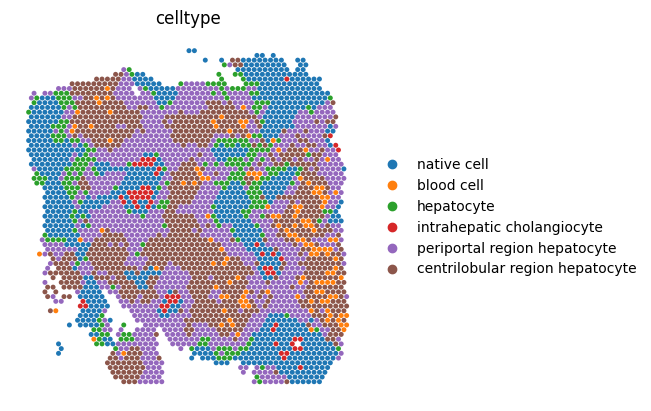

In [10]:
sc.pl.spatial(adata, color='celltype', spot_size=300, img_key=None,frameon=False)

In [26]:
#mapping_dict = pd.Series(.symbo .values,index=mapping_df.Ensembl_ID).to_dict()

In [80]:
#mapping_dict =pd.read_csv('../grch38_ensgene_symbol.csv')[['gene_ids', 'symbol']].set_index('ensgene').to_dict()['symbol']

In [81]:
#pd.read_csv('../grch38_ensgene_symbol.csv')

In [82]:
adata.var['gene_symbols'] = adata.var.index.map(mapping_dict)
unmapped_genes = adata.var['gene_symbols'].isnull().sum()

In [83]:
adata.var['ensembl_ids'] = adata.var.index
adata.var.index = adata.var['gene_symbols']

In [84]:
adata.var_names_make_unique()
adata_sdm = adata.copy()
adata_sdm.raw = adata_sdm.copy()
sc.pp.normalize_total(adata_sdm, target_sum=None)
sc.pp.log1p(adata_sdm)

In [85]:
sdm.extract_lr(adata_sdm, 'human', min_cell=20)

In [86]:
def save_sdm_info(adata_obj, prefix):
    adata_obj.uns['ligand'].to_csv(prefix + '_ligand.csv')
    adata_obj.uns['receptor'].to_csv(prefix + '_receptor.csv')
    adata_obj.uns['geneInter'].to_csv(prefix + '_geneInter.csv')

In [88]:
save_sdm_info(adata_sdm, 'liver_disease_visium_sdm')

In [54]:
adata.write_h5ad(
    os.path.join(
        parent_data, 
        'sclerosing_cholangitis_patient_PSC011_C1.h5ad'
    )
)

In [89]:
adata_sdm.uns['geneInter']

,interaction_name,pathway_name,agonist,antagonist,co_A_receptor,co_I_receptor,evidence,annotation,interaction_name_2
EFNB1_EPHB4,EFNB1_EPHB4,EPHB,NaN,NaN,NaN,NaN,PMID: 15114347,Cell-Cell Contact,EFNB1 - EPHB4
ESAM_ESAM,ESAM_ESAM,ESAM,NaN,NaN,NaN,NaN,KEGG: hsa04514; PMID: 11279107,Cell-Cell Contact,ESAM - ESAM
F11R_F11R,F11R_F11R,JAM,NaN,NaN,NaN,NaN,KEGG: hsa04514,Cell-Cell Contact,F11R - F11R
F11R_JAM3,F11R_JAM3,JAM,NaN,NaN,NaN,NaN,KEGG: hsa04514,Cell-Cell Contact,F11R - JAM3
JAM3_F11R,JAM3_F11R,JAM,NaN,NaN,NaN,NaN,KEGG: hsa04514,Cell-Cell Contact,JAM3 - F11R
...,...,...,...,...,...,...,...,...,...
MIF_CD74_CXCR2,MIF_CD74_CXCR2,MIF,NaN,NaN,NaN,NaN,PMID: 29637711; PMID: 26175090,Secreted Signaling,MIF - (CD74+CXCR2)
MIF_CD74_CD44,MIF_CD74_CD44,MIF,NaN,NaN,NaN,NaN,PMID: 29637711; PMID: 26175090,Secreted Signaling,MIF - (CD74+CD44)
MIF_CD74_CXCR4,MIF_CD74_CXCR4,MIF,NaN,NaN,NaN,NaN,PMID: 29637711; PMID: 24760155,Secreted Signaling,MIF - (CD74+CXCR4)
CXCL12_ACKR3,CXCL12_ACKR3,CXCL,NaN,NaN,NaN,NaN,KEGG: hsa04060,Secreted Signaling,CXCL12 - ACKR3


## Data preparation

In [90]:
count_df = adata.raw.to_adata().to_df()

In [93]:
count_df.shape

(3322, 36503)

In [94]:
adata.to_df().shape

(3322, 36503)

In [96]:
count_df.columns = adata.to_df().columns

In [91]:
int_edges_new, int_edges_with_selfloop = spatial.construct_boundary(
    adata,
    force_recalculate=True,
    distance_aware=False
)

Constructing spatial network with visium


100%|██████████| 3322/3322 [00:02<00:00, 1530.02it/s]


In [1]:
!pwd

/Users/hs0424/Workspace/server_backup_code/copulacci/notebook/examples/visium_human_liver


In [97]:
data_list_dict, umi_sums, dist_list_dict, data_list_dict_selfloop, umi_sums_selfloop, dist_list_dict_selfloop = \
spatial.prepare_data_list_for_visium(
    count_df,
    int_edges_with_selfloop,
    lig_rec_info_df=adata_sdm.uns['geneInter'],
    heteromeric=True,
    lig_df=adata_sdm.uns['ligand'],
    rec_df=adata_sdm.uns['receptor'],
    summarization='sum',
    separate_lig_rec_type=True
)

100%|██████████| 34/34 [00:31<00:00,  1.09it/s]


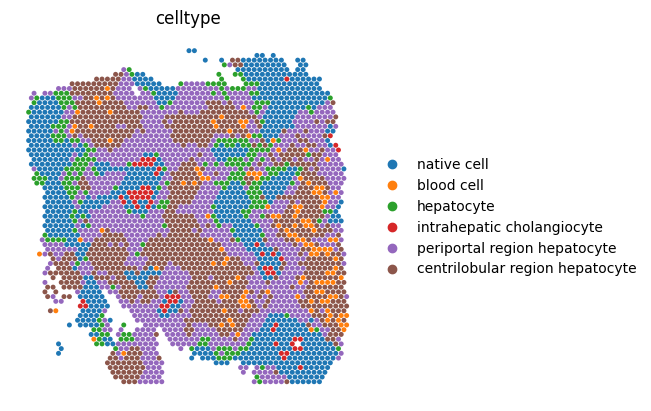

In [98]:
sc.pl.spatial(adata, color='celltype', spot_size=300, img_key=None,frameon=False)

In [109]:
adata.obs.celltype.cat.categories

Index(['native cell', 'blood cell', 'hepatocyte', 'intrahepatic cholangiocyte',
       'periportal region hepatocyte', 'centrilobular region hepatocyte'],
      dtype='object')

In [110]:
data_list_dict, umi_sums, dist_list_dict, data_list_dict_selfloop, umi_sums_selfloop, dist_list_dict_selfloop = \
spatial.prepare_data_list_for_visium(
    count_df,
    int_edges_with_selfloop,
    lig_rec_info_df=adata_sdm.uns['geneInter'],
    heteromeric=True,
    lig_df=adata_sdm.uns['ligand'],
    rec_df=adata_sdm.uns['receptor'],
    summarization='sum',
    separate_lig_rec_type=True
)

100%|██████████| 34/34 [00:31<00:00,  1.09it/s]


<Axes: xlabel='interaction'>

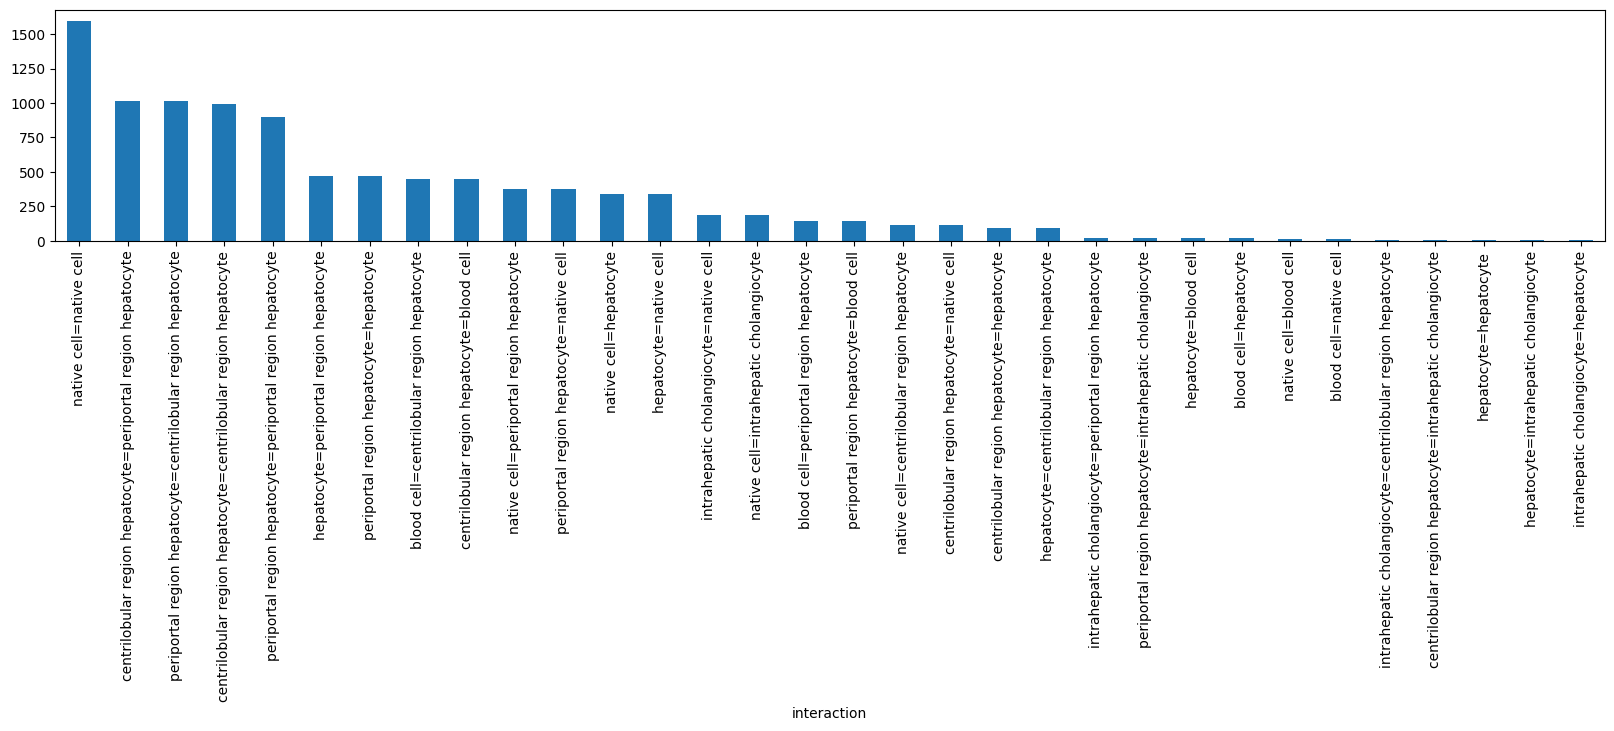

In [111]:
fig, ax = plt.subplots(1,1, figsize=(20,3))
int_edges_new.interaction.value_counts().plot(kind='bar',ax =ax)
#ax.axvline(x=)

In [174]:
focus_interactions = int_edges_new.interaction.value_counts()[
int_edges_new.interaction.value_counts() > 500
].index

In [175]:
focus_interactions

Index(['native cell=native cell',
       'centrilobular region hepatocyte=periportal region hepatocyte',
       'periportal region hepatocyte=centrilobular region hepatocyte',
       'centrilobular region hepatocyte=centrilobular region hepatocyte',
       'periportal region hepatocyte=periportal region hepatocyte'],
      dtype='object', name='interaction')

In [132]:
gpair = 'periportal region hepatocyte=centrilobular region hepatocyte'

In [176]:
#int_edges_new.tail().interaction.to_list()

In [177]:
gpair

'periportal region hepatocyte=centrilobular region hepatocyte'

## Run copula for periportal region hepatocyte → centrilobular region hepatocyte (For quick result run for one pair of groups)

In [178]:
lig_rec_info_df=adata_sdm.uns['geneInter'].copy()
close_contact_index = []
other_index = []
for index,row in lig_rec_info_df.iterrows():
    if row.annotation == 'Cell-Cell Contact':
        close_contact_index += [index]
    else:
        other_index += [index]

In [179]:
copula_params = model2.CopulaParams()
opt_params = model2.OptParams()

cop_df_dict_distant = model2.run_copula(
    data_list_dict,
    umi_sums,
    df_lig_rec_index=other_index,
    groups=focus_interactions,
    n_jobs=20,
    heteronomic=True,
    copula_params=copula_params,
    opt_params=opt_params,
    stability_filter=True,
    quick=True,
    run_find_peaks = True
)

native cell=native cell


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    9.9s
[Parallel(n_jobs=20)]: Done 186 tasks      | elapsed:   11.0s
[Parallel(n_jobs=20)]: Done 282 out of 282 | elapsed:   11.8s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Number of non empty results: 222
centrilobular region hepatocyte=periportal region hepatocyte


[Parallel(n_jobs=20)]: Done 282 out of 282 | elapsed:    0.6s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s


Number of non empty results: 137
periportal region hepatocyte=centrilobular region hepatocyte


[Parallel(n_jobs=20)]: Done 282 out of 282 | elapsed:    0.6s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s


Number of non empty results: 155
centrilobular region hepatocyte=centrilobular region hepatocyte


[Parallel(n_jobs=20)]: Done 282 out of 282 | elapsed:    0.8s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s


Number of non empty results: 130
periportal region hepatocyte=periportal region hepatocyte
Number of non empty results: 227


[Parallel(n_jobs=20)]: Done 282 out of 282 | elapsed:    0.8s finished


In [117]:
copula_df = cop_df_dict_distant[gpair]

In [121]:
copula_df

,copula_coeff,mu_x,mu_y,copula_method
COL6A1_ITGA9_ITGB1,0.068378,-9.934251,-8.784046,copula
COL6A2_ITGA9_ITGB1,-0.022793,-9.668950,-8.784046,copula
COL6A3_ITGA9_ITGB1,0.159550,-11.030853,-8.784046,copula
LAMA2_ITGA9_ITGB1,-0.098108,-11.298653,-8.784046,copula
LAMA5_ITGA9_ITGB1,0.022793,-11.173027,-8.784046,copula
...,...,...,...,...
MIF_CD74_CXCR2,0.068378,-7.110431,-8.257372,copula
MIF_CD74_CD44,0.072342,-7.110431,-8.212483,copula
MIF_CD74_CXCR4,0.068378,-7.110431,-8.212483,copula
CXCL12_ACKR3,0.000000,-9.706690,-10.687219,skip_stability_filter


### Calculate p-values

In [118]:
lig_rec_index = copula_df.loc[copula_df.copula_method == 'copula'].index.tolist()

In [119]:
ligand_df = adata_sdm.uns['ligand'].copy()
receptor_df = adata_sdm.uns['receptor'].copy()

In [180]:
copula_params = model2.CopulaParams()
opt_params = model2.OptParams()
gpair = 'periportal region hepatocyte=centrilobular region hepatocyte'
bg_permutation_dict_outer = {}
for gpair in focus_interactions:
    bg_permutation_data = model2.graph_permutation_pval(
        count_df,
        int_edges_with_selfloop,
        lig_rec_index=lig_rec_index,
        lig_df=ligand_df,
        rec_df=receptor_df,
        groups=[gpair],
        close_group=close_contact_index,
        heteromeric=True,
        n = 500,
        summarization='sum',
        n_jobs=20,
        verbose=0,
        opt_params=opt_params,
        stability_filter=True,
        quick=True,
        run_find_peaks = True
    )
    bg_permutation_dict_outer[gpair] = bg_permutation_data[gpair]

Constructing 500 random graphs with 838 nodes and 1636 edges
Time taken to construct 500 random graphs: 158.91 seconds


100%|██████████| 155/155 [07:07<00:00,  2.76s/it]

Constructing 500 random graphs with 1007 nodes and 1017 edges


Time taken to construct 500 random graphs: 102.58 seconds


100%|██████████| 155/155 [06:23<00:00,  2.48s/it]

Constructing 500 random graphs with 1007 nodes and 1017 edges


Time taken to construct 500 random graphs: 102.55 seconds


100%|██████████| 155/155 [06:24<00:00,  2.48s/it]

Constructing 500 random graphs with 961 nodes and 1458 edges


Time taken to construct 500 random graphs: 142.94 seconds


100%|██████████| 155/155 [06:46<00:00,  2.62s/it]

Constructing 500 random graphs with 1064 nodes and 1512 edges


Time taken to construct 500 random graphs: 148.62 seconds


100%|██████████| 155/155 [07:07<00:00,  2.76s/it]


In [188]:
def add_pvalue(row,bg_permutation_dict):
    if row.name in bg_permutation_dict:
        bg = bg_permutation_dict[row.name]
        if len(bg) < 100:
            return 1.0
        I = row.copula_coeff
        bg = np.append(bg, I)
        pval = np.sum(abs(bg) > abs(I))/len(bg)
        return pval
    return 1.0

for gpair in focus_interactions:
    copula_df = cop_df_dict_distant[gpair].copy()
    copula_df['copula_pval'] = copula_df.apply(lambda row: add_pvalue(row, bg_permutation_dict_outer[gpair]), axis=1)
    from statsmodels.stats.multitest import multipletests
    reject, pvals_corrected, _, _ = multipletests(copula_df.copula_pval, alpha=0.05, method='fdr_bh')
    copula_df['copula_pval_fdr'] = pvals_corrected
    cop_df_dict_distant[gpair] = copula_df.copy()

In [189]:
def linearize_to_df(cop_df_diff_gpairs, filter_copula=True):
    df = pd.DataFrame()
    for gpair in cop_df_diff_gpairs:
        tmp = cop_df_diff_gpairs[gpair].copy()
        if tmp.shape[0] == 0:
            continue
        if filter_copula:
            tmp = tmp.loc[tmp.copula_method == 'copula',:].copy()
        if tmp.shape[0] == 0:
            continue 
        tmp.loc[:,'interaction'] = gpair
        tmp.loc[:,'LR_index'] = tmp.index
        tmp.index = list(range(tmp.shape[0]))
        df = pd.concat([df, tmp], axis = 0, ignore_index=True)
    return df

In [190]:
copulacci_df = linearize_to_df(cop_df_dict_distant)

In [181]:
bg_permutation_dict_outer.keys()

dict_keys(['native cell=native cell', 'centrilobular region hepatocyte=periportal region hepatocyte', 'periportal region hepatocyte=centrilobular region hepatocyte', 'centrilobular region hepatocyte=centrilobular region hepatocyte', 'periportal region hepatocyte=periportal region hepatocyte'])

In [135]:
bg_permutation_dict = bg_permutation_data[gpair].copy()

In [136]:
def add_pvalue(row):
    if row.name in bg_permutation_dict:
        bg = bg_permutation_dict[row.name]
        if len(bg) < 100:
            return 1.0
        I = row.copula_coeff
        bg = np.append(bg, I)
        pval = np.sum(abs(bg) > abs(I))/len(bg)
        return pval
    return 1.0

In [137]:
def draw_background(
    lr_index, 
    copula_df,
    bg_permutation_dict
):
    I = copula_df.loc[lr_index, 'copula_coeff']
    bg = bg_permutation_dict[lr_index]
    if not ('copula_pval' in copula_df.columns):
        bg_I = np.append(bg, I)
        pval = np.sum(abs(bg_I) > abs(I))/len(bg_I)
    else:
        pval = copula_df.loc[lr_index, 'copula_pval']
    plt.figure(figsize=(3,3))
    plt.hist(bg,alpha = 0.8);
    plt.axvline(I, c='r', ls = '--')
    plt.title(f"{lr_index} - Pvalue {pval:.3f}")
    plt.show()

In [138]:
copula_df['copula_pval'] = copula_df.apply(lambda row: add_pvalue(row), axis=1)

In [4]:
copula_df = copula_df.reset_index().rename(columns = {'index' : 'LR_index'})

NameError: name 'copula_df' is not defined

## Run SCC for periportal region hepatocyte → centrilobular region hepatocyte (For quick result run for one pair of groups)

In [194]:
adata_scc = adata.copy()
scc_df_dict = model2.run_scc(
    adata_scc,
    adata_sdm.uns['geneInter'],
    int_edges_new,
    groups=focus_interactions,
    lig_df=adata_sdm.uns['ligand'],
    rec_df=adata_sdm.uns['receptor'],
    n_jobs=20,
    verbose=1,
    heteronomic=True,
    add_pval=True,
    use_spatialdm=True
)

native cell=native cell


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:   12.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:   20.9s
[Parallel(n_jobs=20)]: Done 337 out of 337 | elapsed:   30.3s finished


centrilobular region hepatocyte=periportal region hepatocyte


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:   14.1s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:  2.1min
[Parallel(n_jobs=20)]: Done 282 out of 282 | elapsed:  3.6min finished


periportal region hepatocyte=centrilobular region hepatocyte


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:   13.1s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:  2.1min
[Parallel(n_jobs=20)]: Done 282 out of 282 | elapsed:  3.6min finished


centrilobular region hepatocyte=centrilobular region hepatocyte


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    4.2s
[Parallel(n_jobs=20)]: Done 337 out of 337 | elapsed:    8.7s finished


periportal region hepatocyte=periportal region hepatocyte


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    3.8s
[Parallel(n_jobs=20)]: Done 337 out of 337 | elapsed:    7.7s finished


## Run SDM for periportal region hepatocyte → centrilobular region hepatocyte (For quick result run for one pair of groups)

In [196]:
sdm_df_dict = model.run_sdm(
    adata,
    int_edges_new,
    groups = focus_interactions,
    nproc = 20,
    heteronomic=True
)

native cell=native cell
Graph with 374 nodes and 798 edges
(374, 36503)


/n/fs/ragr-data/users/hirak/environments/mambaforge/envs/copulacci/lib/python3.9/site-packages/spatialdm/utils.py:171: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  native cell=native cell  is  100.7186930179596  seconds
centrilobular region hepatocyte=periportal region hepatocyte
DiGraph with 1007 nodes and 1017 edges
(1007, 36503)


/n/fs/ragr-data/users/hirak/environments/mambaforge/envs/copulacci/lib/python3.9/site-packages/spatialdm/utils.py:171: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  centrilobular region hepatocyte=periportal region hepatocyte  is  150.09991788864136  seconds
periportal region hepatocyte=centrilobular region hepatocyte
DiGraph with 1007 nodes and 1017 edges
(1007, 36503)


/n/fs/ragr-data/users/hirak/environments/mambaforge/envs/copulacci/lib/python3.9/site-packages/spatialdm/utils.py:171: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  periportal region hepatocyte=centrilobular region hepatocyte  is  150.95338892936707  seconds
centrilobular region hepatocyte=centrilobular region hepatocyte
Graph with 263 nodes and 497 edges
(263, 36503)


/n/fs/ragr-data/users/hirak/environments/mambaforge/envs/copulacci/lib/python3.9/site-packages/spatialdm/utils.py:171: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  centrilobular region hepatocyte=centrilobular region hepatocyte  is  100.08362078666687  seconds
periportal region hepatocyte=periportal region hepatocyte
Graph with 250 nodes and 448 edges
(250, 36503)


/n/fs/ragr-data/users/hirak/environments/mambaforge/envs/copulacci/lib/python3.9/site-packages/spatialdm/utils.py:171: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  periportal region hepatocyte=periportal region hepatocyte  is  98.0614881515503  seconds


In [197]:
copulacci_df

,copula_coeff,mu_x,mu_y,copula_method,copula_pval,copula_pval_fdr,interaction,LR_index
0,0.104054,-8.783875,-8.052592,copula,0.021956,0.176903,native cell=native cell,COL6A1_ITGA9_ITGB1
1,0.131802,-8.072102,-8.052592,copula,0.003992,0.048946,native cell=native cell,COL6A2_ITGA9_ITGB1
2,0.111982,-9.205476,-8.052592,copula,0.059880,0.272359,native cell=native cell,COL6A3_ITGA9_ITGB1
3,0.143694,-9.843619,-8.052592,copula,0.113772,0.406124,native cell=native cell,LAMA2_ITGA9_ITGB1
4,0.026757,-10.603457,-8.052592,copula,0.598802,1.000000,native cell=native cell,LAMA5_ITGA9_ITGB1
...,...,...,...,...,...,...,...,...
866,0.036667,-7.170737,-8.471715,copula,0.005988,0.562874,periportal region hepatocyte=periportal region...,MIF_CD74_CXCR2
867,0.034685,-7.170737,-8.414714,copula,0.007984,0.562874,periportal region hepatocyte=periportal region...,MIF_CD74_CD44
868,0.036667,-7.170737,-8.428025,copula,0.009980,0.562874,periportal region hepatocyte=periportal region...,MIF_CD74_CXCR4
869,0.070360,-9.752616,-10.326581,copula,1.000000,1.000000,periportal region hepatocyte=periportal region...,CXCL12_ACKR3


## Merge results

In [198]:
merged_res_dict = {}
for gpair in focus_interactions:
    tmp1 = scc_df_dict[gpair].copy()
    tmp2 = sdm_df_dict[gpair].copy()
    tmp3 = tmp1.join(tmp2[['global_I', 'global_pval']], how='inner')
    copula_df = copulacci_df.loc[copulacci_df.interaction == gpair]
    res = copula_df.set_index('LR_index').join(tmp3, how='inner')
    merged_res_dict[gpair] = res.copy()

In [147]:
from statsmodels.stats.multitest import multipletests
reject, pvals_corrected, _, _ = multipletests(res.copula_pval, alpha=0.05, method='fdr_bh')
res['copula_pval_fdr'] = pvals_corrected

In [166]:
res.loc[res.copula_pval < 0.05].sort_values(
    ['copula_coeff'],
    ascending=False).head(10)

,copula_coeff,mu_x,mu_y,copula_method,copula_pval,scc,scc_pval,global_I,global_pval,copula_pval_fdr
THBS1_ITGAV_ITGB3,0.286396,-9.281129,-10.604981,copula,0.008032,0.037011,0.109780,0.014825,1.873435e-184,0.788024
F2_PARD3,0.096126,-6.711359,-10.858177,copula,0.031936,0.038269,0.091816,0.002909,1.671692e-08,0.900599
AGT_AGTR1B,0.076306,-6.476659,-9.701935,copula,0.045908,0.001753,0.946108,-0.002721,1.000000e+00,1.000000
MIF_CD74_CD44,0.072342,-7.110431,-8.212483,copula,0.013972,0.070259,0.001996,0.053537,0.000000e+00,0.788024
MIF_CD74_CXCR2,0.068378,-7.110431,-8.257372,copula,0.011976,0.057198,0.019960,0.047497,0.000000e+00,0.788024
MIF_CD74_CXCR4,0.068378,-7.110431,-8.212483,copula,0.013972,0.042277,0.083832,0.032424,0.000000e+00,0.788024
COL4A2_ITGA1_ITGB1,-0.175405,-10.112155,-8.389646,copula,0.019960,0.008705,0.726547,0.026566,0.000000e+00,0.900599
COL4A2_ITGA10_ITGB1,-0.197207,-10.112155,-8.848940,copula,0.029940,-0.024047,0.321357,-0.008591,1.000000e+00,0.900599
COL4A2_ITGA11_ITGB1,-0.207117,-10.112155,-8.862670,copula,0.029940,-0.024047,0.333333,-0.008591,1.000000e+00,0.900599
COL4A2_ITGA2_ITGB1,-0.213063,-10.112155,-8.864977,copula,0.023952,-0.024047,0.295409,-0.008591,1.000000e+00,0.900599


In [163]:
import itertools
score_pair = list(itertools.combinations(['copula_coeff', 'scc','global_I'],2))
from copulacci import plots2

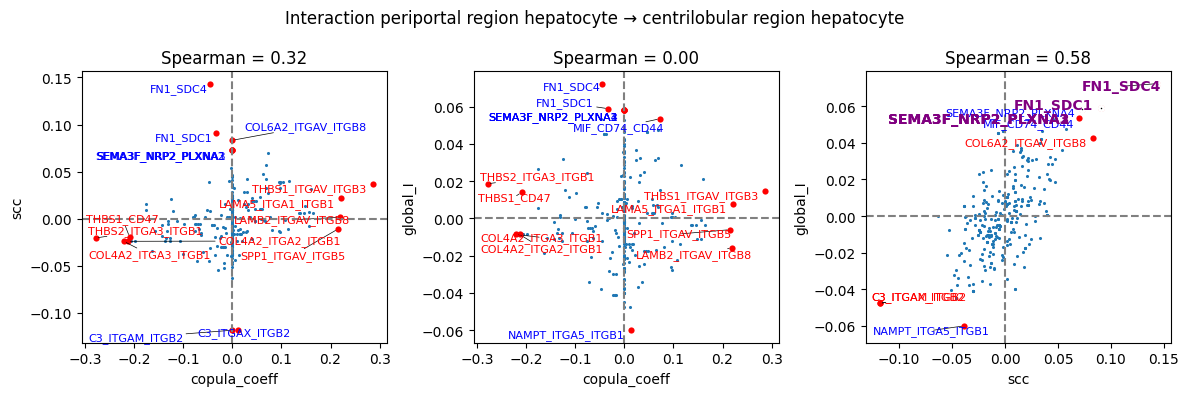

In [164]:
plots2.draw_pairwise_scatter(
    res,
    gpair,
    score_pair,
    bimod_filter=False,
    s = 5,
    ntop=8,
    center_plot=False
    #only_pos=True
)

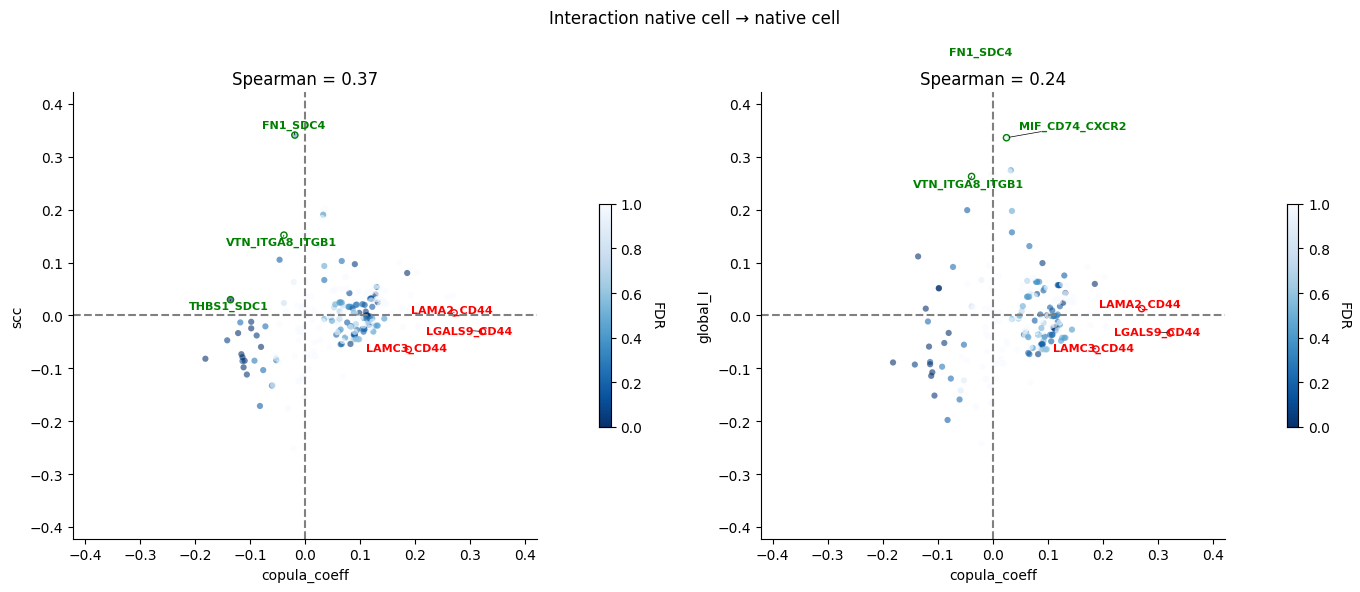

In [199]:
plots2.draw_pairwise_scatter_with_pval(
    merged_res_dict,
    'native cell=native cell',
    score_pair[:2],
    ntop=3,
    center_plot=True,
    take_diff=True,
    fig_size = (14,6),
    force_text_pos=(1,0.1)
)

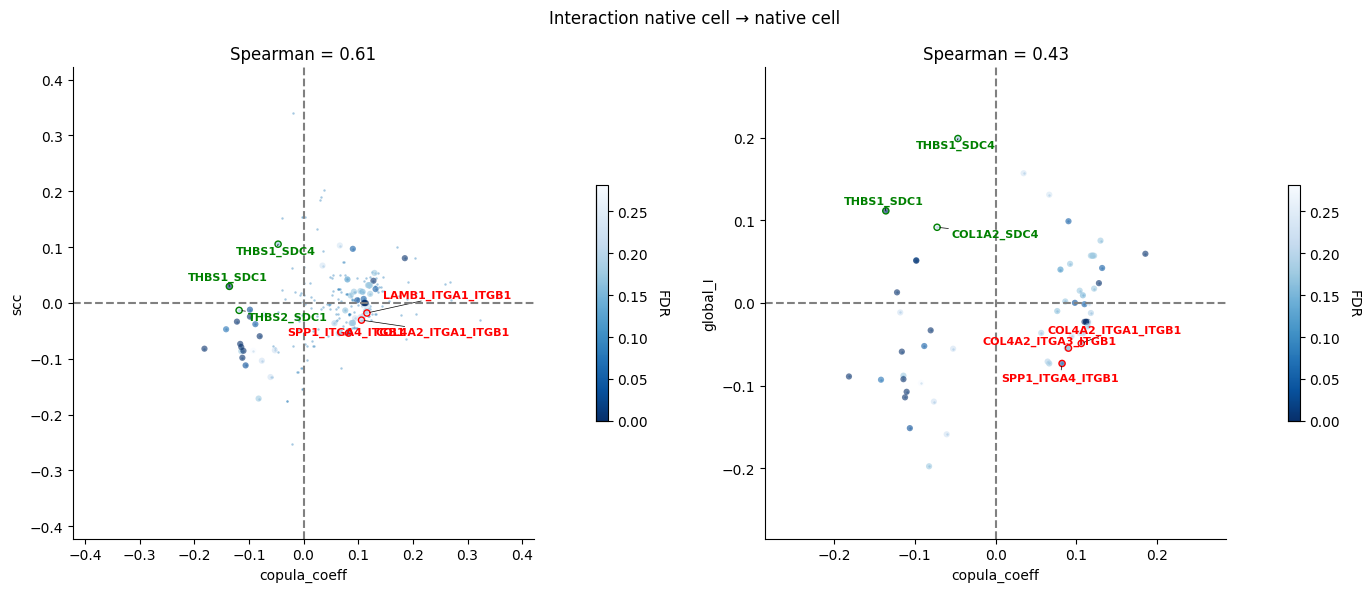

In [201]:
plots2.draw_pairwise_scatter_with_pval(
    merged_res_dict,
    'native cell=native cell',
    score_pair[:2],
    ntop=3,
    center_plot=True,
    take_diff=True,
    fig_size = (14,6),
    force_text_pos=(1,0.1),
    use_cutoff=True,
    cutoff=0.3
)

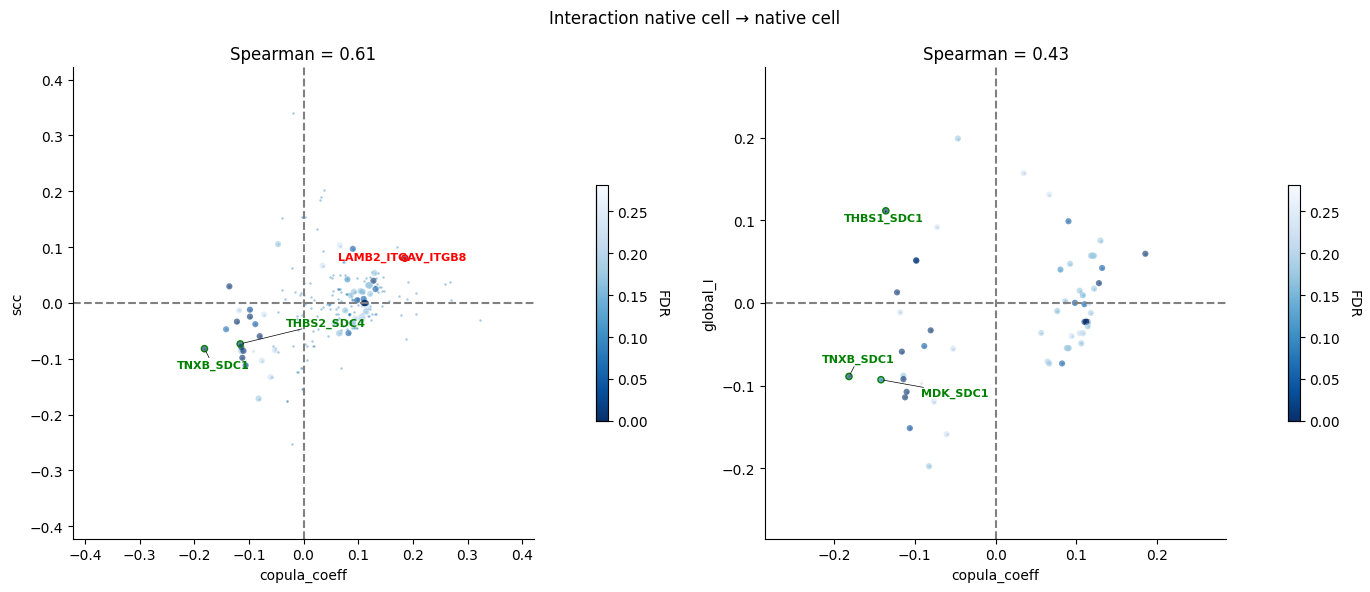

In [202]:
plots2.draw_pairwise_scatter_with_pval(
    merged_res_dict,
    'native cell=native cell',
    score_pair[:2],
    ntop=3,
    center_plot=True,
    take_sim=True,
    fig_size = (14,6),
    force_text_pos=(1,0.1),
    use_cutoff=True,
    cutoff=0.3
)

In [203]:
from matplotlib.colors import Normalize
def plot_norm_lr_boundary_in_same_plot(
    gpair,
    lr_index,
    loc_df,
    int_edges_new,
    gene1,
    gene2,
    count_df,
    merged_res,
    shrink_fraction=1.0,
    file_name = None,
    figure_parent = ".",
    figsize = (7,5),
    markersize = 10,
    cont_type = 'other',
    copula_params=model2.CopulaParams()
):
    int_type = gpair
    lr_pairs_ct = int_edges_new.loc[
            int_edges_new.interaction == int_type,
            :
    ].copy()

    tmp = loc_df
    tmp = tmp.loc[
        list(set(lr_pairs_ct.cell1).union(lr_pairs_ct.cell2).intersection(tmp.index)),
        :
    ]

    x, y, us1, us2 = plots2.get_data(
        lr_index,
        gpair,
        other_index,
        close_contact_index,
        data_list_dict,
        data_list_dict_selfloop,
        umi_sums,
        umi_sums_selfloop,
        cont_type='other'
    )
    copula_params = copula_params._replace(return_sum=False)
    sx = np.log(x.sum() / us1.sum())
    sy = np.log(y.sum() / us2.sum())

    if isinstance(merged_res, pd.DataFrame):
        res = merged_res.copy()
    else:
        res = merged_data_dict[gpair].copy()
    
    coeff = res.loc[lr_index].copula_coeff
    loglikvec = model2.calculate_mahalanobis_distance(
        [coeff, sx, sy],
        x,
        y,
        us1,
        us2,
        copula_params
    )
    lr_pairs_ct['copula_score'] = loglikvec
    
    selected_cells_1 = list(set(lr_pairs_ct.cell1).intersection(set(tmp.index)))
    selected_cells_2 = list(set(lr_pairs_ct.cell2).intersection(set(tmp.index)))

    max_gene1 = count_df.loc[selected_cells_1, gene1].values.max()
    max_gene2 = count_df.loc[selected_cells_2, gene2].values.max()
    global_max = max(max_gene1, max_gene2)
    global_min = min(
        count_df.loc[selected_cells_1, gene1].values.min(),
        count_df.loc[selected_cells_2, gene2].values.min()
    )
    
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    ax.scatter(loc_df['x'], loc_df['y'], c= "grey", s=0.1,alpha = 0.4)
    colors = np.array(count_df.loc[selected_cells_1, gene1].values)
    tmp = loc_df.loc[selected_cells_1,:].copy()
    tmp.loc[:, 'gene'] = colors
    sns.scatterplot(x='x', y='y', hue='gene',
                     palette='Reds',s=markersize, data=tmp,edgecolor='black',alpha=1,ax= ax)
    norm = Normalize(tmp['gene'].min(), tmp['gene'].max())
    #norm = Normalize(global_min, global_max)
    sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
    sm.set_array([])
    ax.get_legend().remove()
    cax = ax.figure.colorbar(sm,ax=ax,shrink=shrink_fraction,pad=-0.01)
    cax.set_label(gene1, color='red', rotation=270, labelpad=15)
    
    colors = np.array(count_df.loc[selected_cells_2, gene2].values)
    tmp = loc_df.loc[selected_cells_2,:].copy()
    tmp.loc[:, 'gene'] = colors
    sns.scatterplot(x='x', y='y', hue='gene',marker="^",
                     palette='Blues',s=markersize, data=tmp,edgecolor='black',alpha=1,ax= ax)
    norm = Normalize(tmp['gene'].min(), tmp['gene'].max())
    #norm = Normalize(global_min, global_max)
    sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
    sm.set_array([])
    ax.get_legend().remove()
    ax.set_title(f"{lr_index} - copula: {coeff:.2f} \n {gpair}")
    #ax.set_title(gene1 + " | " + gene2 + "\n" + gpair)
    cax = ax.figure.colorbar(sm,ax=ax,shrink=shrink_fraction, pad=-0.01)
    cax.set_label(gene2, color='blue', rotation=270, labelpad=15)


    # draw edges
    norm = Normalize(vmin=min(lr_pairs_ct.copula_score), 
                     vmax=np.quantile(lr_pairs_ct.copula_score, 0.9))
    cmap = plt.get_cmap('Greys')
    for ind,row in lr_pairs_ct.iterrows():
        x1, y1 = loc_df.loc[  row.cell1, 'x' ], loc_df.loc[  row.cell1, 'y' ]
        x2, y2 = loc_df.loc[  row.cell2, 'x' ], loc_df.loc[  row.cell2, 'y' ]
        dx = x2 - x1
        dy = y2 - y1
        color = cmap(norm(row.copula_score))
        # ax.plot([x1, x2], [y1, y2], color='black',
        #         linestyle='-', markersize=0.5,linewidth=0.3)
        ax.quiver(np.array([x1]), np.array([y1]), 
                  np.array([dx]), np.array([dy]),
                  angles='xy', scale_units='xy',
                  color=color,
                  scale=1, 
                  headwidth=10,
                  headaxislength=5,
                  headlength=10,
                  width=0.001,
                 )
        # ax.arrow(x1, y1, dx, dy, head_width=0.05, 
        #          head_length=0.1, fc='k', ec='k')

    norm = Normalize(vmin=min(lr_pairs_ct.copula_score), 
                     vmax=np.quantile(lr_pairs_ct.copula_score,0.9))
    #norm = Normalize(global_min, global_max)
    sm = plt.cm.ScalarMappable(cmap="Greys", norm=norm)
    sm.set_array([])
    cax = ax.figure.colorbar(sm,ax=ax,shrink=shrink_fraction,pad=0.01)
    cax.set_label('mhl', color='blue', rotation=270, labelpad=15)
    
    ax.invert_yaxis()
    ax.set_xticks([])
    ax.set_yticks([]);
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.tight_layout()
    if file_name is not None:
        plt.savefig(os.path.join(figure_parent, file_name), format='pdf', dpi=500)
    plt.show()

In [205]:
count_df_norm = count_df.div(count_df.sum(1), axis = 0) 
count_df_norm_log = np.log( count_df_norm + 1 )

loc_df = plots2.get_loc_df(adata_sdm)

In [207]:
gpair

'periportal region hepatocyte=periportal region hepatocyte'

In [208]:
parent_dir = '.'
lr_index = 'LAMB2_ITGAV_ITGB8'
plot_norm_lr_boundary_in_same_plot(
    'native cell=native cell',
    lr_index,
    loc_df,
    int_edges_new,
    gene1='LAMB2',
    gene2='ITGB8',
    count_df = count_df,
    merged_res=res,
    shrink_fraction=0.3,
    markersize=5,
    figsize=(8,6),
    figure_parent = parent_dir,
    #file_name='BRCA_CXCL11_CXCR3_two_color.pdf'
)

ValueError: Length of values (2434) does not match length of index (1596)